In [1]:
import imageio

In [67]:
import glob

In [84]:
import pandas as pd

In [85]:
import seaborn as sns

In [104]:
# different features
flat_files = glob.glob("screenshots\\flatlayers\\bw\\*.png")
salt_files = glob.glob("screenshots\\salt\\bw\\*.png")
gasc_files = glob.glob("screenshots\\gas_chimney\\bw\\*.png")

# images in
flat_im = [imageio.imread(im) for im in flat_files]
salt_im = [imageio.imread(im) for im in salt_files]
gasc_im = [imageio.imread(im) for im in gasc_files]

print(len(flat_im), len(salt_im), len(gasc_files))



44 90 57


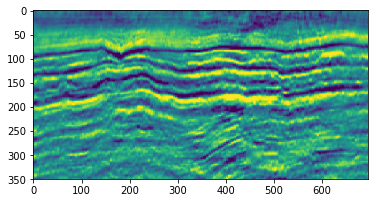

In [109]:
import matplotlib.pyplot as plt

plt.imshow(np.array(flat_im[4].tolist())[:,:,0])
plt.show()
#for im in flat_col_im:
#    print(np.min(np.array(im.tolist())), np.max(np.array(im.tolist())))
    

In [118]:
ser = [np.array(im.tolist())[:,:,0] for im in flat_im]

df_flat = pd.DataFrame()
df_flat['ampbw'] = pd.Series(ser)
df_flat['categ'] = 'flat'
df_flat['imsizex'] = [s.shape[0] for s in ser]
df_flat['imsizey'] = [s.shape[1] for s in ser]

ser = [np.array(im.tolist())[:,:,0] for im in salt_im]

df_salt = pd.DataFrame()
df_salt['ampbw'] = pd.Series(ser)
df_salt['categ'] = 'salt'
df_salt['imsizex'] = [s.shape[0] for s in ser]
df_salt['imsizey'] = [s.shape[1] for s in ser]

ser = [np.array(im.tolist())[:,:,0] for im in gasc_im]

df_gasc = pd.DataFrame()
df_gasc['ampbw'] = pd.Series(ser)
df_gasc['categ'] = 'gasc'
df_gasc['imsizex'] = [s.shape[0] for s in ser]
df_gasc['imsizey'] = [s.shape[1] for s in ser]

df = pd.concat([df_flat, df_salt, df_gasc])


In [112]:
df_flat.describe()

,imsizex,imsizey
count,44.000000,44.000000
mean,494.954545,835.840909
std,84.319149,144.391094
min,169.000000,514.000000
25%,456.250000,750.250000
50%,509.000000,823.000000
75%,561.500000,943.500000
max,621.000000,1133.000000


In [114]:
df_salt.describe()

,imsizex,imsizey
count,90.0000,90.000000
mean,391.1000,366.100000
std,84.6456,119.994667
min,219.0000,146.000000
25%,325.0000,274.500000
50%,381.5000,354.500000
75%,444.0000,440.000000
max,590.0000,685.000000


In [115]:
df_gasc.describe()

,imsizex,imsizey
count,57.000000,57.000000
mean,278.807018,325.350877
std,130.129666,126.186298
min,81.000000,77.000000
25%,177.000000,241.000000
50%,261.000000,327.000000
75%,321.000000,394.000000
max,590.000000,719.000000


Text(0.5, 1.0, 'pixelsy')

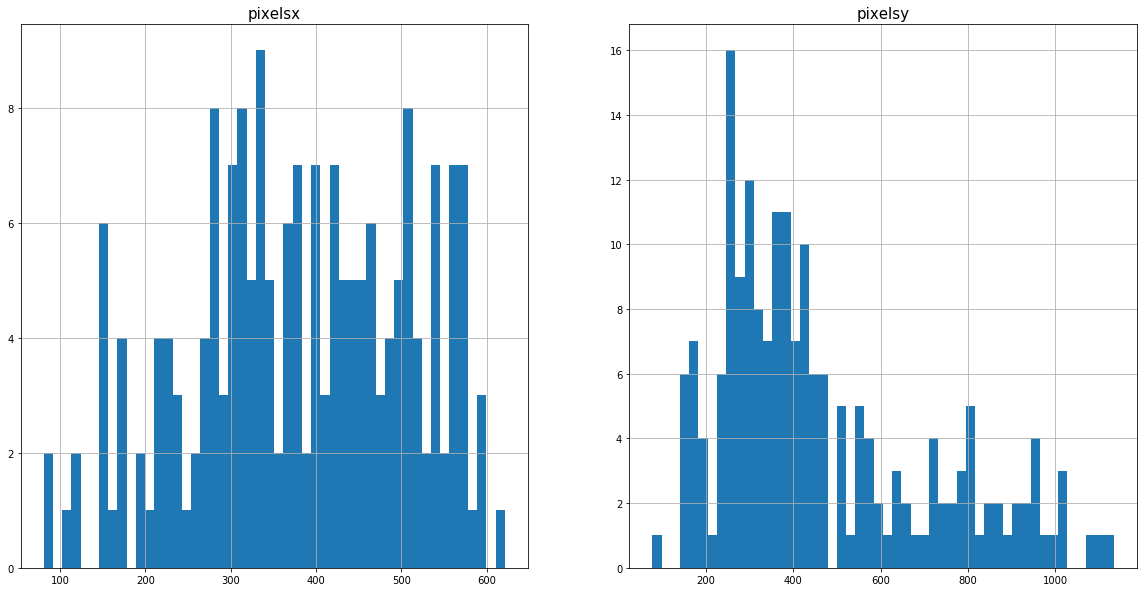

In [128]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(20,10))

df['imsizex'].hist(ax=axs[0], bins=50)
df['imsizey'].hist(ax=axs[1], bins=50)
axs[0].set_title('pixelsx', fontsize=15)
axs[1].set_title('pixelsy', fontsize=15)

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>